In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

## Load Data

In [2]:
salaries = pd.read_csv("data/cleaned_data.csv")
salaries

,Timestamp,Age,Location,Industry,Job_Title,Experience,Salary_USD,Salary_Local,Currency
0,4/24/2019 11:43:21,35-44,"Nashville, TN, USA",Government,Talent Management Asst. Director,11 - 20 years,75000.0,75000,USD
1,4/24/2019 11:43:26,25-34,"Madison, WI",Environmental Consulting,Operations Director,8 - 10 years,65000.0,65000,USD
2,4/24/2019 11:43:27,18-24,"Las Vegas, NV USA",Market Research,Market Research Analyst,2 - 4 years,36330.0,36330,USD
3,4/24/2019 11:43:27,25-34,"Cardiff, UK",Biotechnology,Senior Scientist,5-7 years,47402.0,34600,GBP
4,4/24/2019 11:43:29,25-34,Southeast Michigan,Healthcare,Social worker (embedded in primary care),5-7 years,55000.0,55000,USD
...,...,...,...,...,...,...,...,...,...
31534,5/7/2020 16:19:27,35-44,"Chicago, IL",Higher Ed,Department Head,11 - 20 years,125000.0,125000,USD
31535,5/9/2020 15:47:22,35-44,"St. Paul, MN, USA",Government,Environmental Scientist,11 - 20 years,65000.0,65000,USD
31536,5/9/2020 20:35:05,35-44,"Chicago, IL, USA",Software,Senior Director,11 - 20 years,160000.0,160000,USD
31537,5/10/2020 4:01:22,35-44,"Los Angeles, CA, USA",Newspapers,Reporter,11 - 20 years,39500.0,39500,USD


## Most Frequent Industries (Count)

<AxesSubplot:xlabel='Industry', ylabel='count'>

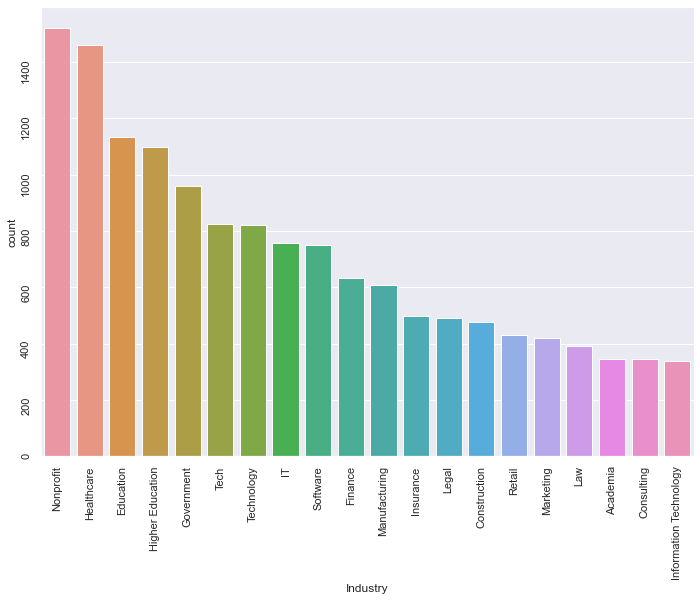

In [3]:
sns.set_theme(style="darkgrid")

top_n = salaries["Industry"].value_counts().iloc[:20].index
top = salaries[salaries["Industry"].isin(top_n)]

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax.tick_params(labelrotation=90)
sns.countplot(ax=ax, x="Industry", data=top, order=top["Industry"].value_counts().index)

## Most Frequent Job Titles (Count)

<AxesSubplot:xlabel='Job_Title', ylabel='count'>

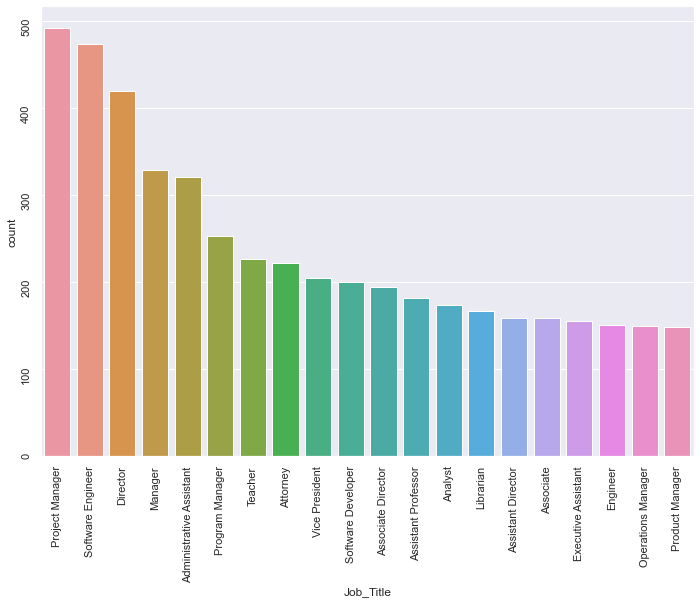

In [4]:
sns.set_theme(style="darkgrid")

top_n = salaries["Job_Title"].value_counts().iloc[:20].index
top = salaries[salaries["Job_Title"].isin(top_n)]

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax.tick_params(labelrotation=90)
sns.countplot(ax=ax, x="Job_Title", data=top, order=top["Job_Title"].value_counts().index)

## Most Frequent Locations (Count)

<AxesSubplot:xlabel='Location', ylabel='count'>

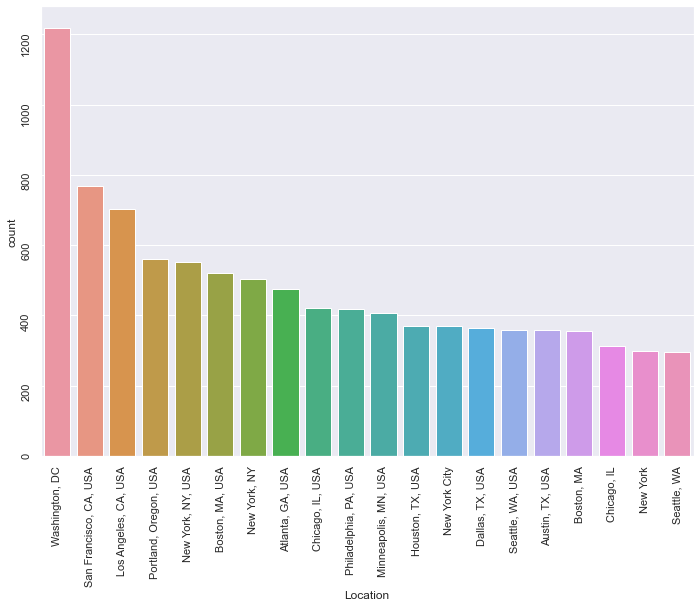

In [5]:
sns.set_theme(style="darkgrid")

top_n = salaries["Location"].value_counts().iloc[:20].index
top = salaries[salaries["Location"].isin(top_n)]

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax.tick_params(labelrotation=90)
sns.countplot(ax=ax, x="Location", data=top, order=top["Location"].value_counts().index)

## Most Frequent Currency (Count)

<AxesSubplot:xlabel='Currency', ylabel='count'>

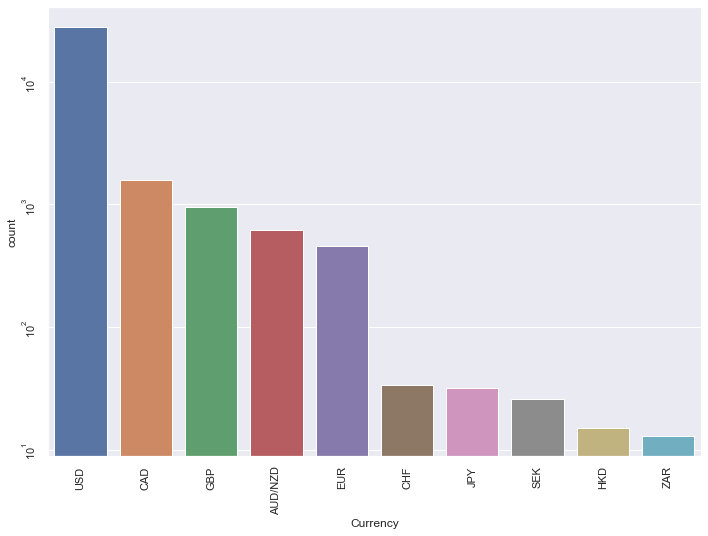

In [6]:
sns.set_theme(style="darkgrid")

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax.tick_params(labelrotation=90)
ax.set(yscale="log")
sns.countplot(ax=ax, x="Currency", data=salaries, order=salaries["Currency"].value_counts().index)

## Most Frequent Experience Group (Count)

<AxesSubplot:xlabel='Experience', ylabel='count'>

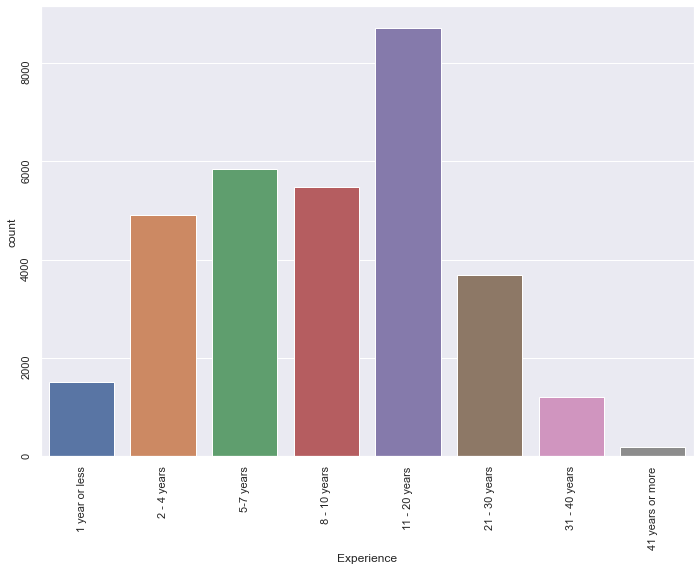

In [7]:
sns.set_theme(style="darkgrid")

order = ['1 year or less', '2 - 4 years', '5-7 years', '8 - 10 years', '11 - 20 years',
       '21 - 30 years', '31 - 40 years', '41 years or more']

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax.tick_params(labelrotation=90)
sns.countplot(ax=ax, x="Experience", data=salaries, order=order)

## Most Frequent Age Group (Count)

<AxesSubplot:xlabel='Age', ylabel='count'>

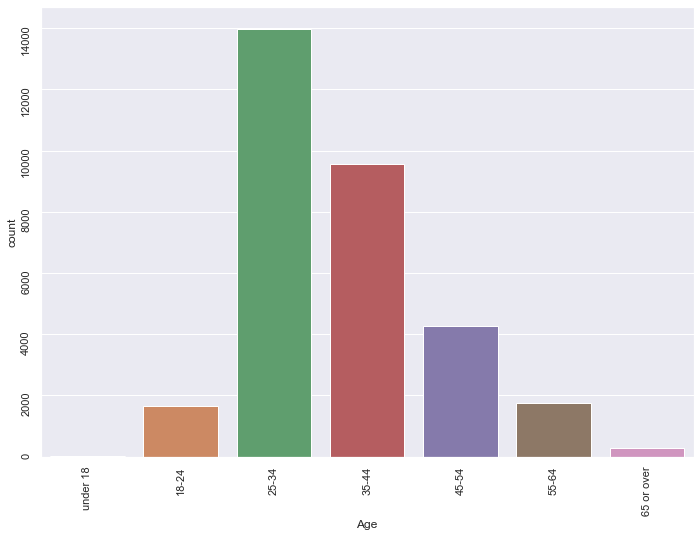

In [8]:
sns.set_theme(style="darkgrid")

order = ['under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65 or over']

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax.tick_params(labelrotation=90)
sns.countplot(ax=ax, x="Age", data=salaries, order=order)

## Top Salaries by Industry with more than 100 responses (Median)

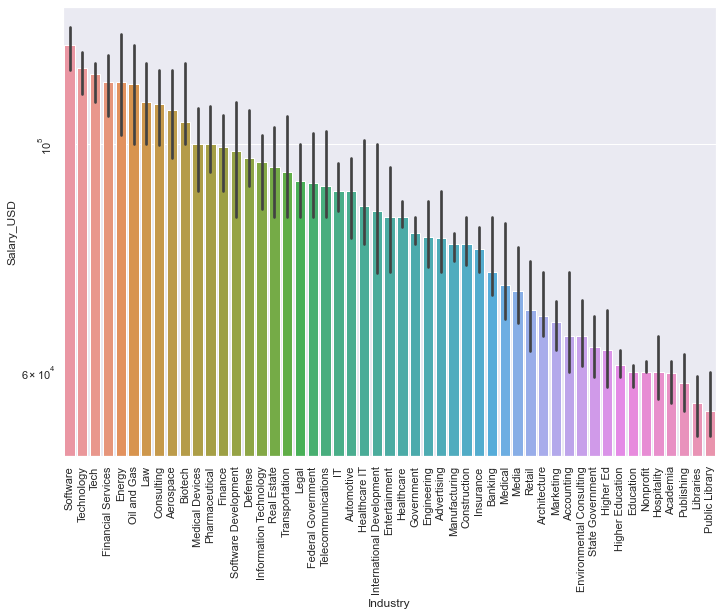

In [9]:
sns.set_theme(style="darkgrid")

industry_counts = salaries["Industry"].value_counts()
more_than_100 = industry_counts[industry_counts > 100]

top = salaries[salaries["Industry"].isin(more_than_100.index)]
top_n = top.groupby("Industry").aggregate(func=np.median).sort_values(by="Salary_USD", ascending=False)

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax.tick_params(labelrotation=90)
ax.set(yscale="log")
ax = sns.barplot(x="Industry", y="Salary_USD", data=top, estimator=np.median, order=top_n.index)

## Top Salaries by Job Title with more than 100 responses (Median)

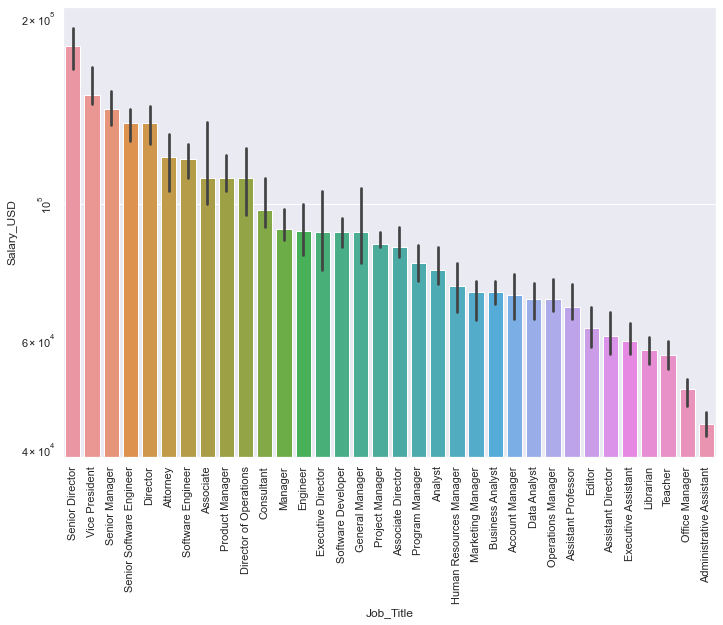

In [10]:
sns.set_theme(style="darkgrid")

industry_counts = salaries["Job_Title"].value_counts()
more_than_100 = industry_counts[industry_counts > 100]

top = salaries[salaries["Job_Title"].isin(more_than_100.index)]
top_n = top.groupby("Job_Title").aggregate(func=np.median).sort_values(by="Salary_USD", ascending=False)

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax.tick_params(labelrotation=90)
ax.set(yscale="log")
ax = sns.barplot(x="Job_Title", y="Salary_USD", data=top, estimator=np.median, order=top_n.index)

## Top Salaries by Location with more than 100 responses (Median)

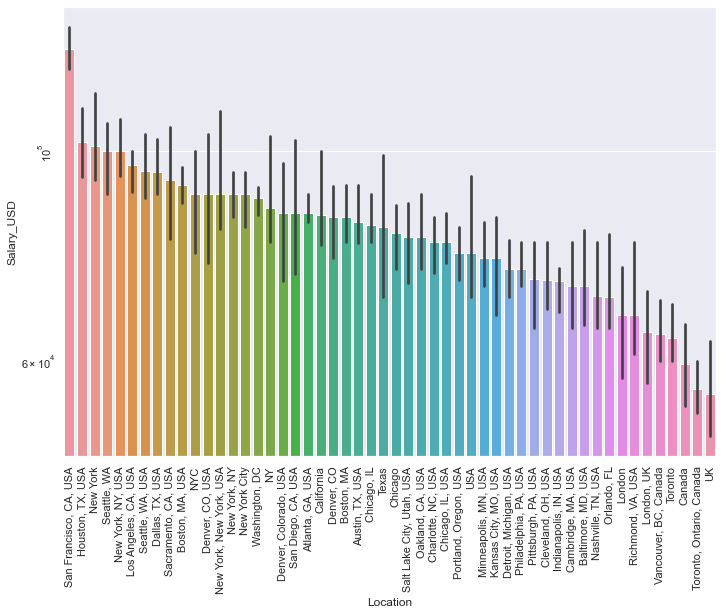

In [11]:
sns.set_theme(style="darkgrid")

industry_counts = salaries["Location"].value_counts()
more_than_100 = industry_counts[industry_counts > 100]

top = salaries[salaries["Location"].isin(more_than_100.index)]
top_n = top.groupby("Location").aggregate(func=np.median).sort_values(by="Salary_USD", ascending=False)

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax.tick_params(labelrotation=90)
ax.set(yscale="log")
ax = sns.barplot(x="Location", y="Salary_USD", data=top, estimator=np.median, order=top_n.index)

## Top Salaries (USD) by Currency

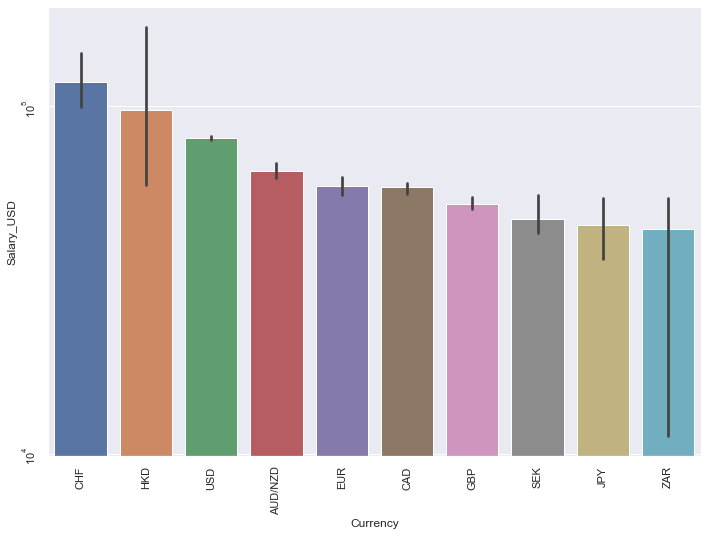

In [12]:
sns.set_theme(style="darkgrid")

top_n = salaries.groupby("Currency").aggregate(func=np.median).sort_values(by="Salary_USD", ascending=False).index[:20]
top = salaries[salaries["Currency"].isin(top_n)]

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax.tick_params(labelrotation=90)
ax.set(yscale="log")
ax = sns.barplot(x="Currency", y="Salary_USD", data=salaries, estimator=np.median, order=top_n)

## Top Salaries by Experience (Median)

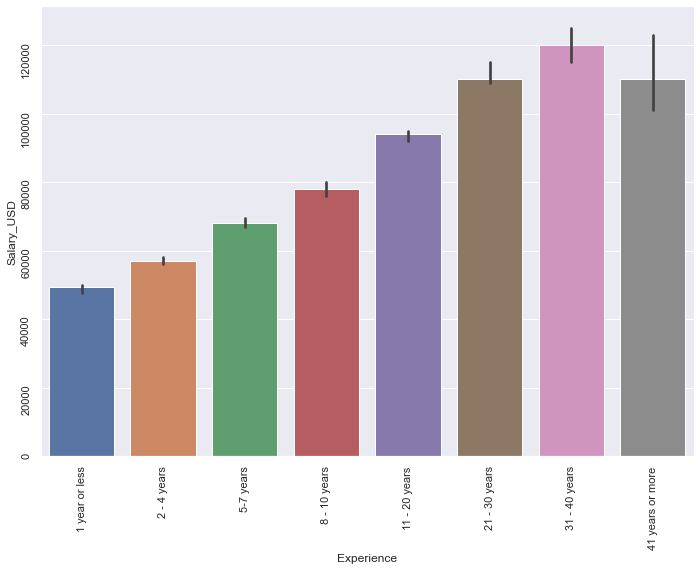

In [13]:
sns.set_theme(style="darkgrid")


order = ['1 year or less', '2 - 4 years', '5-7 years', '8 - 10 years', '11 - 20 years',
       '21 - 30 years', '31 - 40 years', '41 years or more']

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax.tick_params(labelrotation=90)
ax = sns.barplot(x="Experience", y="Salary_USD", data=salaries, estimator=np.median, order=order)

## Top Salaries by Age Group (Median)

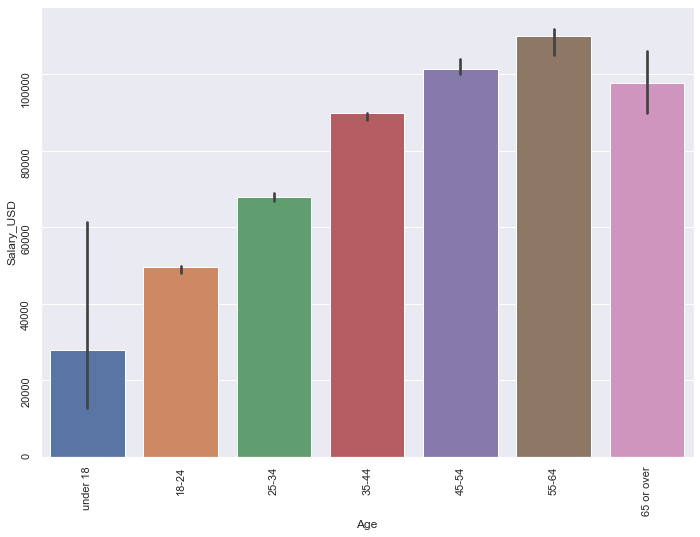

In [14]:
sns.set_theme(style="darkgrid")


order = ['under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65 or over']

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax.tick_params(labelrotation=90)
ax = sns.barplot(x="Age", y="Salary_USD", data=salaries, estimator=np.median, order=order)